<a href="https://colab.research.google.com/github/Marcooos05/Algo-Trading-Journal/blob/main/EURUSD4HR_BollingerBands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [150]:
# Load Forex Price Data
df = pd.read_csv('EURUSD4HR.csv')
df

,Column1,Column2,Open,High,Low,Close,Volume
0,"""2008-05-19",4:00:00 AM,1.55690,1.56017,1.55623,1.55929,"28934"""
1,"""2008-05-19",8:00:00 AM,1.55916,1.56333,1.55635,1.55864,"174840"""
2,"""2008-05-19",12:00:00 PM,1.55846,1.55927,1.54811,1.55133,"239680"""
3,"""2008-05-19",4:00:00 PM,1.55125,1.55216,1.54934,1.55063,"151339"""
4,"""2008-05-19",8:00:00 PM,1.55036,1.55317,1.54899,1.55264,"53878"""
...,...,...,...,...,...,...,...
25843,"""2024-05-27",8:00:00 AM,1.08505,1.08674,1.08450,1.08573,"20769"""
25844,"""2024-05-27",12:00:00 PM,1.08576,1.08600,1.08405,1.08595,"30745"""
25845,"""2024-05-27",4:00:00 PM,1.08595,1.08619,1.08571,1.08597,"6284"""
25846,"""2024-05-27",8:00:00 PM,1.08597,1.08618,1.08521,1.08614,"5288"""


In [151]:
# Calculating 20 Ticks (5 days) moving average
df['20_MA_Close'] = df['Close'].rolling(window=20).mean()
# calculating 20 Ticks (5 days) rolling standard devtaion
df['20_std_Close'] = df['Close'].rolling(window=20).std()

In [152]:
df.tail()


,Column1,Column2,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close
25843,"""2024-05-27",8:00:00 AM,1.08505,1.08674,1.08450,1.08573,"20769""",1.083440,0.001540
25844,"""2024-05-27",12:00:00 PM,1.08576,1.08600,1.08405,1.08595,"30745""",1.083600,0.001628
25845,"""2024-05-27",4:00:00 PM,1.08595,1.08619,1.08571,1.08597,"6284""",1.083718,0.001712
25846,"""2024-05-27",8:00:00 PM,1.08597,1.08618,1.08521,1.08614,"5288""",1.083921,0.001749
25847,"""2024-05-28",12:00:00 AM,1.08615,1.08735,1.08608,1.08722,"13456""",1.084156,0.001862


In [153]:
# Using the standard deviation, calculate the lows and highs of the Bollinger Bands
df['Bollinger_Low'] = df['20_MA_Close'] - 2*df['20_std_Close']
df['Bollinger_High'] = df['20_MA_Close'] + 2*df['20_std_Close']

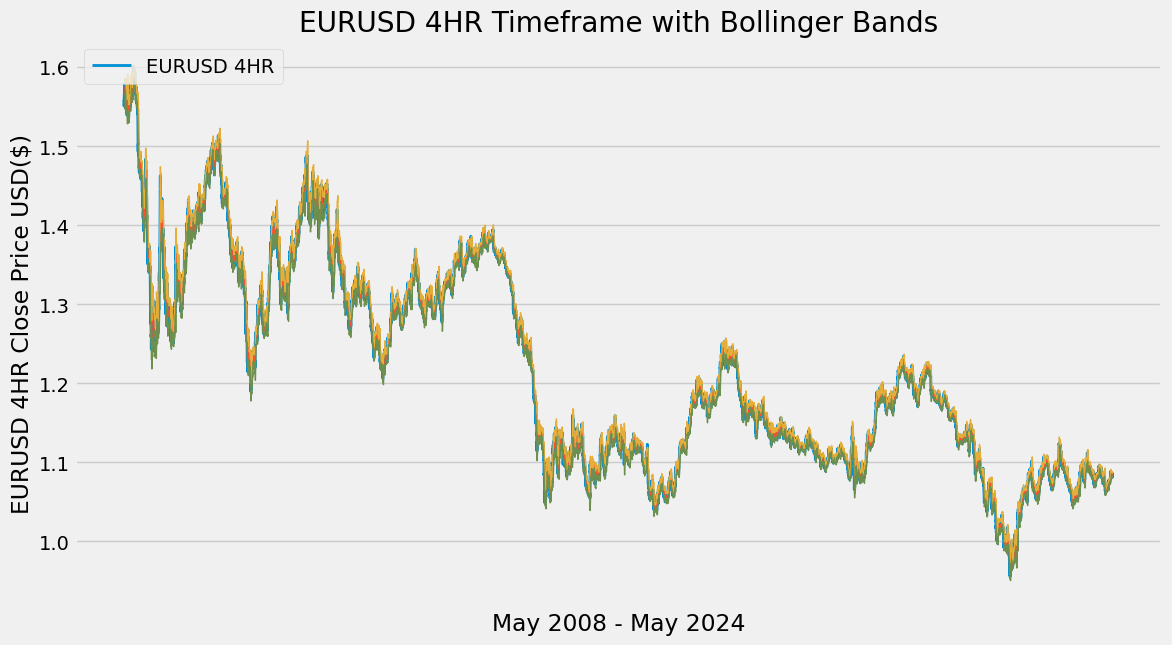

In [154]:
# Visualise the full dataset
plt.figure(figsize = (12.5, 7))
plt.plot(df['Close'], label = 'EURUSD 4HR', linewidth = 2)
plt.plot(df['20_MA_Close'], linewidth = 1)
plt.plot(df['Bollinger_High'], linewidth = 1)
plt.plot(df['Bollinger_Low'], linewidth = 1)
plt.title('EURUSD 4HR Timeframe with Bollinger Bands')
plt.xticks([])
plt.ylabel('EURUSD 4HR Close Price USD($)')
plt.xlabel('May 2008 - May 2024')
plt.legend(loc="upper left")
plt.show()

In [155]:
data = df.tail(653)
data

,Column1,Column2,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close,Bollinger_Low,Bollinger_High
25195,"""2024-01-01",8:00:00 PM,1.10427,1.10447,1.10356,1.10365,"3928""",1.107290,0.003127,1.101037,1.113544
25196,"""2024-01-02",12:00:00 AM,1.10366,1.10432,1.10176,1.10245,"24507""",1.107202,0.003241,1.100720,1.113684
25197,"""2024-01-02",4:00:00 AM,1.10245,1.10380,1.10151,1.10153,"30175""",1.107097,0.003393,1.100312,1.113883
25198,"""2024-01-02",8:00:00 AM,1.10156,1.10387,1.09665,1.09690,"70044""",1.106737,0.004047,1.098642,1.114831
25199,"""2024-01-02",12:00:00 PM,1.09691,1.09717,1.09410,1.09435,"86417""",1.106159,0.004906,1.096348,1.115971
...,...,...,...,...,...,...,...,...,...,...,...
25843,"""2024-05-27",8:00:00 AM,1.08505,1.08674,1.08450,1.08573,"20769""",1.083440,0.001540,1.080360,1.086519
25844,"""2024-05-27",12:00:00 PM,1.08576,1.08600,1.08405,1.08595,"30745""",1.083600,0.001628,1.080344,1.086856
25845,"""2024-05-27",4:00:00 PM,1.08595,1.08619,1.08571,1.08597,"6284""",1.083718,0.001712,1.080294,1.087142
25846,"""2024-05-27",8:00:00 PM,1.08597,1.08618,1.08521,1.08614,"5288""",1.083921,0.001749,1.080423,1.087418


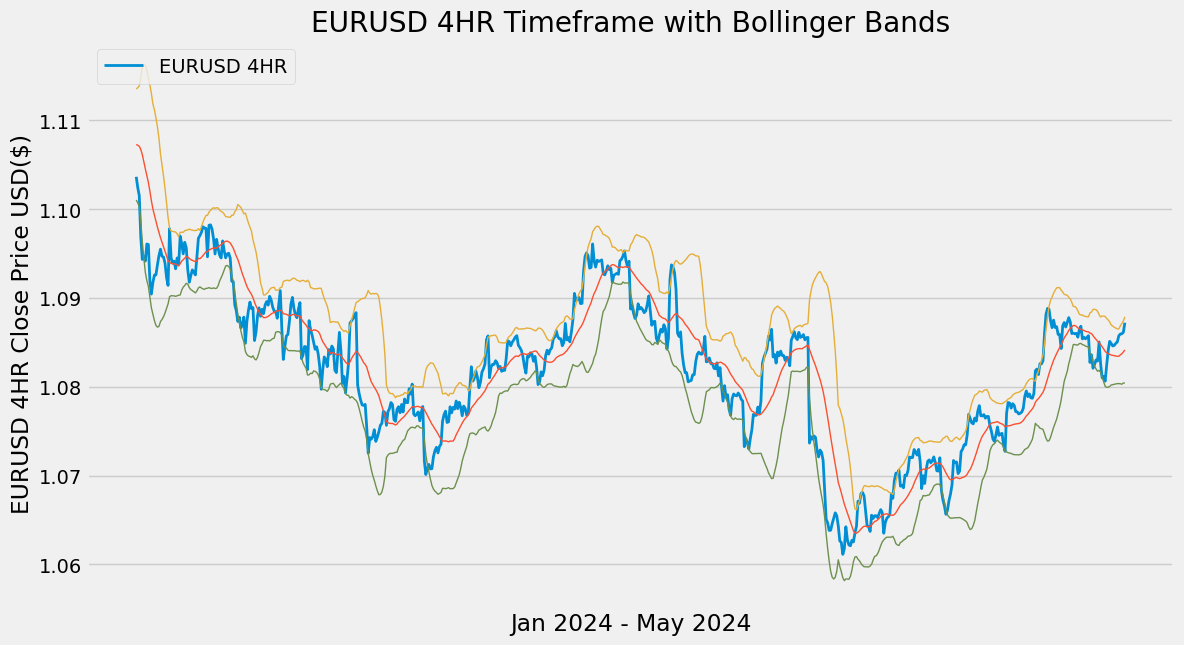

In [156]:
# Narrow down dataset to only look at 2024 data
plt.figure(figsize = (12.5, 7))
plt.plot(data['Close'], label = 'EURUSD 4HR', linewidth = 2)
plt.plot(data['20_MA_Close'], linewidth = 1)
plt.plot(data['Bollinger_High'], linewidth = 1)
plt.plot(data['Bollinger_Low'], linewidth = 1)
plt.title('EURUSD 4HR Timeframe with Bollinger Bands')
plt.xticks([])
plt.ylabel('EURUSD 4HR Close Price USD($)')
plt.xlabel('Jan 2024 - May 2024')
plt.legend(loc="upper left")
plt.show()

In [157]:
#Create a function for buy and sell signal
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  sigCloseTrade = []
  profit = {'Entry':0, 'Pips':[]}
  trade = 0 #variable to signify if the state of the EURUSD trade

  for n in range(len(data)):
    if data['Close'].iloc[n] <= data['Bollinger_Low'].iloc[n] and trade == 0: # Signal to close a short trade
      sigCloseTrade.append(data['Bollinger_Low'].iloc[n])
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
      if profit['Entry'] != 0:
        profit['Pips'].append(10000*(profit['Entry'] - data['Close'].iloc[n]))
      trade = 1
    elif data['Close'].iloc[n] > data['Bollinger_Low'].iloc[n] and trade == 1: # Signal to enter a long trade
      sigCloseTrade.append(np.nan)
      sigPriceBuy.append(data['Close'].iloc[n])
      sigPriceSell.append(np.nan)
      profit['Entry'] = data['Close'].iloc[n]
      trade = 2
    elif data['Close'].iloc[n] >= data['Bollinger_High'].iloc[n] and trade == 2: # Signal to close a long trade
      sigCloseTrade.append(data['Bollinger_High'].iloc[n])
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
      profit['Pips'].append(10000*(data['Close'].iloc[n] - profit['Entry']))
      trade = 3
    elif data['Close'].iloc[n] < data['Bollinger_High'].iloc[n] and trade == 3: # Signal to enter a short trade
      sigCloseTrade.append(np.nan)
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(data['Close'].iloc[n])
      profit['Entry'] = data['Close'].iloc[n]
      trade = 0
    else:
      sigCloseTrade.append(np.nan)
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell, sigCloseTrade, profit)

In [158]:
buy_sell_arr = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell_arr[0]
data['Sell_Signal_Price'] = buy_sell_arr[1]
data['Close_Signal'] = buy_sell_arr[2]
stats = buy_sell_arr[3]
print(stats['Pips'])
print(sum(stats['Pips']))
data

[-74.69999999999865, 157.59999999999997, 85.69999999999966, 3.900000000001125, 99.70000000000034, -18.100000000000893, -4.8000000000003595, 127.99999999999923, 25.299999999999212, 101.40000000000038, -73.39999999999903, -14.800000000001479, 108.20000000000051, -63.29999999999947]
460.7000000000005


<ipython-input-158-6a49c9abd984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy_Signal_Price'] = buy_sell_arr[0]
<ipython-input-158-6a49c9abd984>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sell_Signal_Price'] = buy_sell_arr[1]
<ipython-input-158-6a49c9abd984>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Column1,Column2,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close,Bollinger_Low,Bollinger_High,Buy_Signal_Price,Sell_Signal_Price,Close_Signal
25195,"""2024-01-01",8:00:00 PM,1.10427,1.10447,1.10356,1.10365,"3928""",1.107290,0.003127,1.101037,1.113544,NaN,NaN,NaN
25196,"""2024-01-02",12:00:00 AM,1.10366,1.10432,1.10176,1.10245,"24507""",1.107202,0.003241,1.100720,1.113684,NaN,NaN,NaN
25197,"""2024-01-02",4:00:00 AM,1.10245,1.10380,1.10151,1.10153,"30175""",1.107097,0.003393,1.100312,1.113883,NaN,NaN,NaN
25198,"""2024-01-02",8:00:00 AM,1.10156,1.10387,1.09665,1.09690,"70044""",1.106737,0.004047,1.098642,1.114831,NaN,NaN,1.098642
25199,"""2024-01-02",12:00:00 PM,1.09691,1.09717,1.09410,1.09435,"86417""",1.106159,0.004906,1.096348,1.115971,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25843,"""2024-05-27",8:00:00 AM,1.08505,1.08674,1.08450,1.08573,"20769""",1.083440,0.001540,1.080360,1.086519,NaN,NaN,NaN
25844,"""2024-05-27",12:00:00 PM,1.08576,1.08600,1.08405,1.08595,"30745""",1.083600,0.001628,1.080344,1.086856,NaN,NaN,NaN
25845,"""2024-05-27",4:00:00 PM,1.08595,1.08619,1.08571,1.08597,"6284""",1.083718,0.001712,1.080294,1.087142,NaN,NaN,NaN
25846,"""2024-05-27",8:00:00 PM,1.08597,1.08618,1.08521,1.08614,"5288""",1.083921,0.001749,1.080423,1.087418,NaN,NaN,NaN


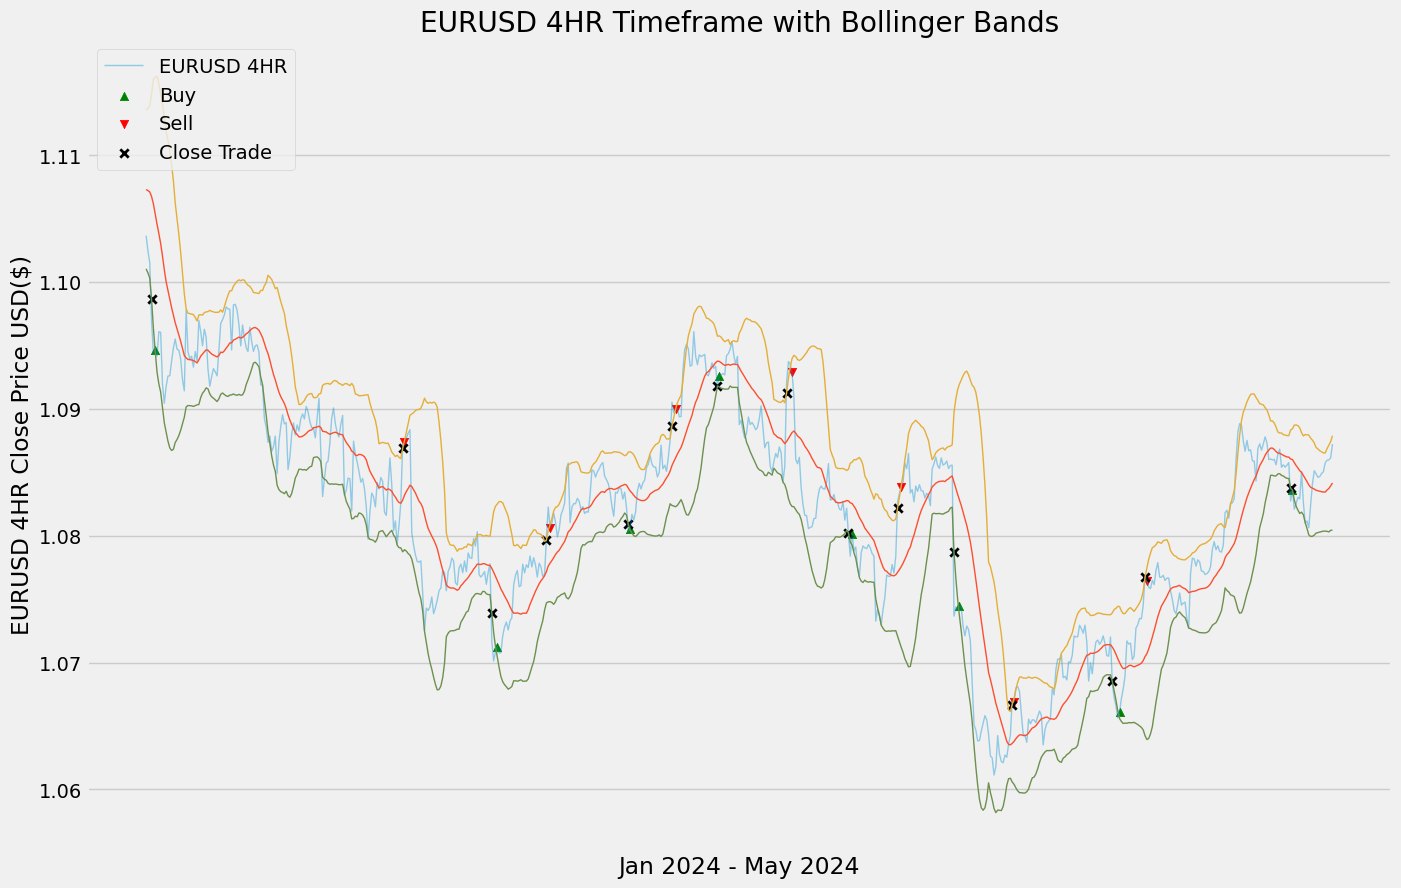

In [159]:
# Visualize Bollinger Band with Close price and Buy & Sell Signals
plt.figure(figsize = (15, 10))
plt.plot(data['Close'], label = 'EURUSD 4HR', linewidth = 1, alpha = 0.4)
plt.plot(data['20_MA_Close'], linewidth = 1)
plt.plot(data['Bollinger_High'], linewidth = 1)
plt.plot(data['Bollinger_Low'], linewidth = 1)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.scatter(data.index, data['Close_Signal'], label = 'Close Trade', marker = 'x', color = 'black', linewidth = 2)
plt.title('EURUSD 4HR Timeframe with Bollinger Bands')
plt.xticks([])
plt.ylabel('EURUSD 4HR Close Price USD($)')
plt.xlabel('Jan 2024 - May 2024')
plt.legend(loc="upper left")
plt.show()

In [173]:
# Using 1.75 standard deviation, calculate the lows and highs of the Bollinger Bands - more sensitive than 2std Bollinger Bands
df['Bollinger_Low'] = df['20_MA_Close'] - 1.75*df['20_std_Close']
df['Bollinger_High'] = df['20_MA_Close'] + 1.75*df['20_std_Close']

In [174]:
data = df.tail(653)
data

,Column1,Column2,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close,Bollinger_Low,Bollinger_High,Bollinger_Low_2std,Bollinger_High_2std
25195,"""2024-01-01",8:00:00 PM,1.10427,1.10447,1.10356,1.10365,"3928""",1.107290,0.003127,1.101662,1.112919,1.101819,1.112762
25196,"""2024-01-02",12:00:00 AM,1.10366,1.10432,1.10176,1.10245,"24507""",1.107202,0.003241,1.101368,1.113036,1.101530,1.112874
25197,"""2024-01-02",4:00:00 AM,1.10245,1.10380,1.10151,1.10153,"30175""",1.107097,0.003393,1.100990,1.113205,1.101160,1.113035
25198,"""2024-01-02",8:00:00 AM,1.10156,1.10387,1.09665,1.09690,"70044""",1.106737,0.004047,1.099451,1.114022,1.099654,1.113819
25199,"""2024-01-02",12:00:00 PM,1.09691,1.09717,1.09410,1.09435,"86417""",1.106159,0.004906,1.097329,1.114990,1.097574,1.114745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25843,"""2024-05-27",8:00:00 AM,1.08505,1.08674,1.08450,1.08573,"20769""",1.083440,0.001540,1.080668,1.086211,1.080745,1.086134
25844,"""2024-05-27",12:00:00 PM,1.08576,1.08600,1.08405,1.08595,"30745""",1.083600,0.001628,1.080670,1.086530,1.080751,1.086449
25845,"""2024-05-27",4:00:00 PM,1.08595,1.08619,1.08571,1.08597,"6284""",1.083718,0.001712,1.080636,1.086800,1.080722,1.086714
25846,"""2024-05-27",8:00:00 PM,1.08597,1.08618,1.08521,1.08614,"5288""",1.083921,0.001749,1.080773,1.087068,1.080861,1.086980


In [175]:
buy_sell_arr = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell_arr[0]
data['Sell_Signal_Price'] = buy_sell_arr[1]
data['Close_Signal'] = buy_sell_arr[2]
stats = buy_sell_arr[3]
print(stats['Pips'])
print(sum(stats['Pips']))
data

[36.49999999999931, 26.299999999999102, 1.7000000000000348, 151.49999999999997, 55.000000000000604, 75.1999999999997, 85.69999999999966, 7.300000000001194, 36.89999999999971, -61.40000000000035, 27.29999999999899, 54.60000000000021, 40.10000000000069, 127.99999999999923, 25.299999999999212, 116.09999999999899, -71.79999999999964, -6.500000000000394, 108.20000000000051, 36.800000000001276, 47.900000000000716, -13.600000000000279]
907.0999999999984


<ipython-input-175-6a49c9abd984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Buy_Signal_Price'] = buy_sell_arr[0]
<ipython-input-175-6a49c9abd984>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sell_Signal_Price'] = buy_sell_arr[1]
<ipython-input-175-6a49c9abd984>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Column1,Column2,Open,High,Low,Close,Volume,20_MA_Close,20_std_Close,Bollinger_Low,Bollinger_High,Bollinger_Low_2std,Bollinger_High_2std,Buy_Signal_Price,Sell_Signal_Price,Close_Signal
25195,"""2024-01-01",8:00:00 PM,1.10427,1.10447,1.10356,1.10365,"3928""",1.107290,0.003127,1.101662,1.112919,1.101819,1.112762,NaN,NaN,NaN
25196,"""2024-01-02",12:00:00 AM,1.10366,1.10432,1.10176,1.10245,"24507""",1.107202,0.003241,1.101368,1.113036,1.101530,1.112874,NaN,NaN,NaN
25197,"""2024-01-02",4:00:00 AM,1.10245,1.10380,1.10151,1.10153,"30175""",1.107097,0.003393,1.100990,1.113205,1.101160,1.113035,NaN,NaN,NaN
25198,"""2024-01-02",8:00:00 AM,1.10156,1.10387,1.09665,1.09690,"70044""",1.106737,0.004047,1.099451,1.114022,1.099654,1.113819,NaN,NaN,1.099451
25199,"""2024-01-02",12:00:00 PM,1.09691,1.09717,1.09410,1.09435,"86417""",1.106159,0.004906,1.097329,1.114990,1.097574,1.114745,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25843,"""2024-05-27",8:00:00 AM,1.08505,1.08674,1.08450,1.08573,"20769""",1.083440,0.001540,1.080668,1.086211,1.080745,1.086134,NaN,NaN,NaN
25844,"""2024-05-27",12:00:00 PM,1.08576,1.08600,1.08405,1.08595,"30745""",1.083600,0.001628,1.080670,1.086530,1.080751,1.086449,NaN,NaN,NaN
25845,"""2024-05-27",4:00:00 PM,1.08595,1.08619,1.08571,1.08597,"6284""",1.083718,0.001712,1.080636,1.086800,1.080722,1.086714,NaN,NaN,NaN
25846,"""2024-05-27",8:00:00 PM,1.08597,1.08618,1.08521,1.08614,"5288""",1.083921,0.001749,1.080773,1.087068,1.080861,1.086980,NaN,NaN,NaN


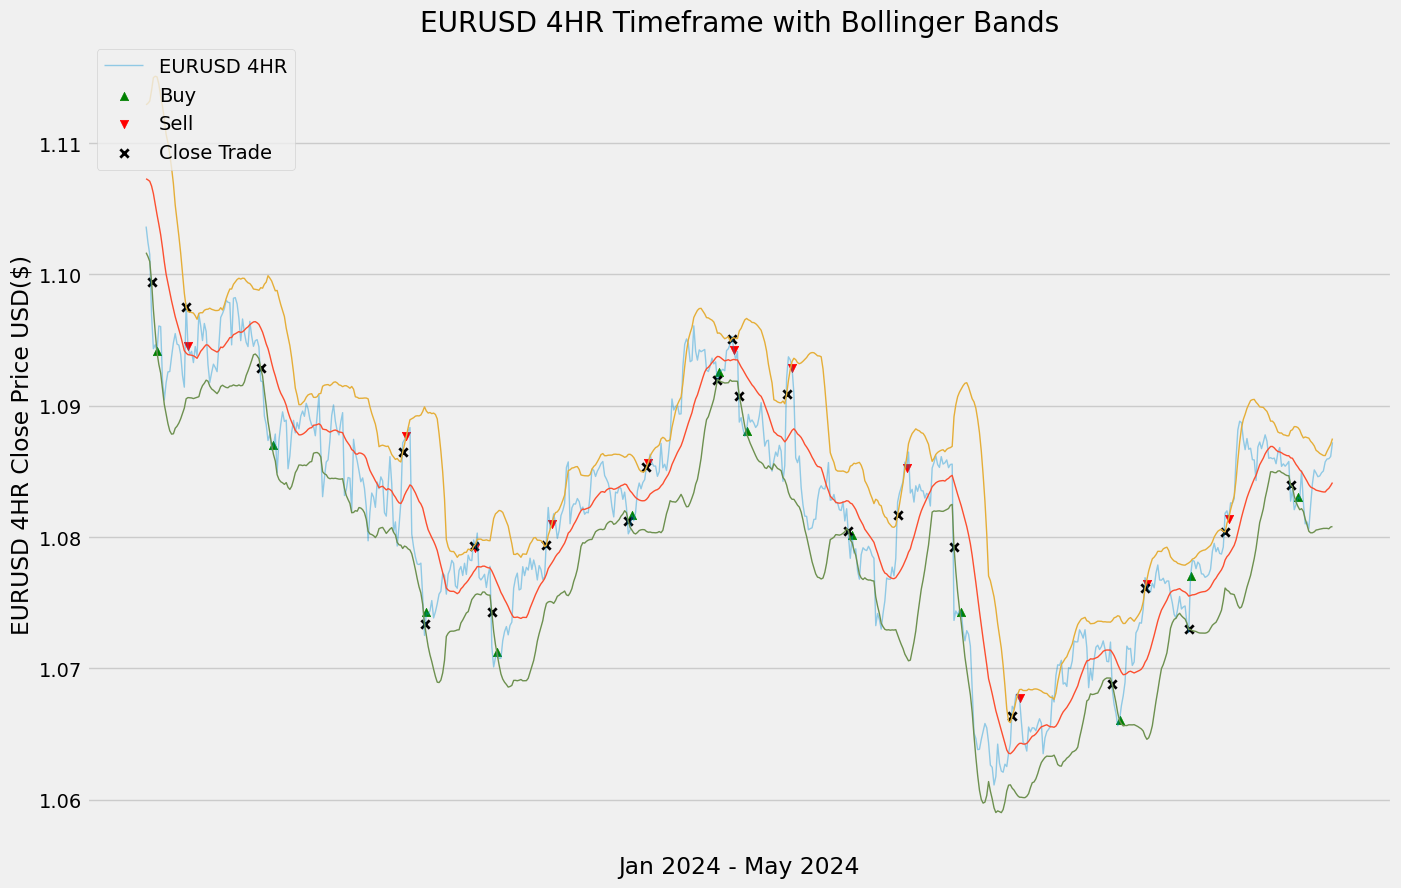

In [176]:
# Visualize Bollinger Band with Close price and Buy & Sell Signals
plt.figure(figsize = (15, 10))
plt.plot(data['Close'], label = 'EURUSD 4HR', linewidth = 1, alpha = 0.4)
plt.plot(data['20_MA_Close'], linewidth = 1)
plt.plot(data['Bollinger_High'], linewidth = 1)
plt.plot(data['Bollinger_Low'], linewidth = 1)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.scatter(data.index, data['Close_Signal'], label = 'Close Trade', marker = 'x', color = 'black', linewidth = 2)
plt.title('EURUSD 4HR Timeframe with Bollinger Bands')
plt.xticks([])
plt.ylabel('EURUSD 4HR Close Price USD($)')
plt.xlabel('Jan 2024 - May 2024')
plt.legend(loc="upper left")
plt.show()